# 🦵 Projekt: Verletzungsrisiken im Sport

In diesem Projekt untersuche ich, welche Sportarten am häufigsten zu Verletzungen führen und welche Körperregionen besonders betroffen sind. Die Daten stammen aus echten Notaufnahmemeldungen aus den Jahren 2020–2021.

In [ ]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv("sportverletzungen_groß.csv")

# Vorschau anzeigen
df.head(10)



,Sportart,Körperregion,Geschlecht,Alter,Diagnose,Jahr
0,Joggen,Finger,w,25,Luxation,2018
1,Joggen,Rücken,m,44,Prellung,2020
2,Krafttraining,Finger,w,52,Prellung,2020
3,Basketball,Ellenbogen,w,33,Bänderriss,2018
4,Klettern,Schulter,m,40,Zerrung,2020
5,Tanzen,Hüfte,m,12,Verstauchung,2021
6,Klettern,Sprunggelenk,m,42,Verstauchung,2021
7,Krafttraining,Hüfte,m,50,Meniskusschaden,2018
8,Klettern,Schulter,m,34,Luxation,2019
9,Klettern,Hüfte,m,25,Bänderriss,2018


## Überblick über die Daten

Der Datensatz enthält Informationen zu Verletzungen, aufgeteilt nach Sportart, Geschlecht, Körperregion, Diagnose, Alter und Jahr. Im Folgenden werden erste Häufigkeiten analysiert.

In [ ]:
# Spaltennamen
df.columns

# Statistische Grundübersicht
df.describe(include="all")


,Sportart,Körperregion,Geschlecht,Alter,Diagnose,Jahr
count,1000,1000,1000,1000.000000,1000,1000.000000
unique,10,8,2,NaN,8,NaN
top,Volleyball,Ellenbogen,w,NaN,Bänderriss,NaN
freq,115,139,528,NaN,139,NaN
mean,NaN,NaN,NaN,35.332000,NaN,2019.926000
std,NaN,NaN,NaN,14.065974,NaN,1.422866
min,NaN,NaN,NaN,12.000000,NaN,2018.000000
25%,NaN,NaN,NaN,23.000000,NaN,2019.000000
50%,NaN,NaN,NaN,35.000000,NaN,2020.000000
75%,NaN,NaN,NaN,47.000000,NaN,2021.000000


## Verletzungen nach Sportart

Welche Sportarten kommen im Datensatz am häufigsten vor?

In [ ]:
df["Sportart"].value_counts()

,count
Sportart,
Volleyball,115
Joggen,111
Klettern,109
Skateboard,103
Krafttraining,101
Reiten,100
Tennis,93
Fußball,91
Basketball,90


👉 Volleyball ist am häufigsten vertreten. Das deutet auf eine höhere Verletzungsrate oder höhere Teilnahmezahlen hin.

## Knieverletzungen pro Sportart
Welche Sportarten führen besonders häufig zu Knieverletzungen?

In [ ]:
df[df["Körperregion"] == "Knie"]["Sportart"].value_counts()

,count
Sportart,
Tennis,17
Tanzen,13
Volleyball,12
Klettern,12
Basketball,12
Joggen,11
Krafttraining,11
Reiten,10
Skateboard,9


👉 Knieverletzungen treten besonders häufig im Tennis auf.

## Visualisierung: Verletzungen pro Sportart
Ein einfaches Balkendiagramm der häufigsten Sportarten.

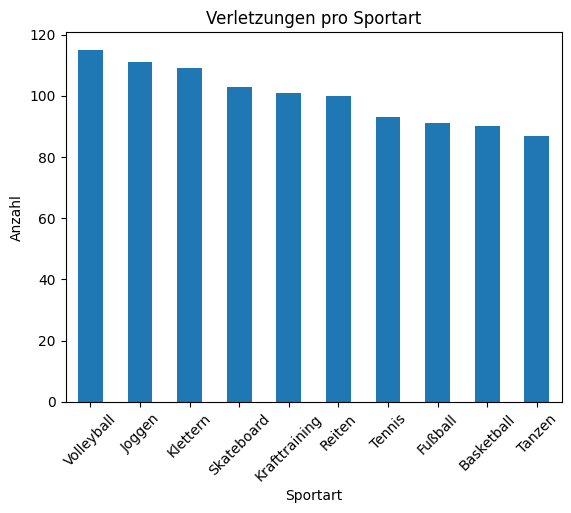

In [ ]:
import matplotlib.pyplot as plt

df["Sportart"].value_counts().plot(kind="bar")
plt.title("Verletzungen pro Sportart")
plt.xlabel("Sportart")
plt.ylabel("Anzahl")
plt.xticks(rotation=45)
plt.show()

## 📈 Trendanalyse über Jahre

In diesem Abschnitt untersuche ich, ob sich die Anzahl der gemeldeten Verletzungen im Zeitverlauf verändert hat. Dafür werte ich die Verteilung der Fälle nach Jahr aus.

<Axes: title={'center': 'Verletzungen pro Jahr'}, xlabel='Jahr', ylabel='Anzahl'>

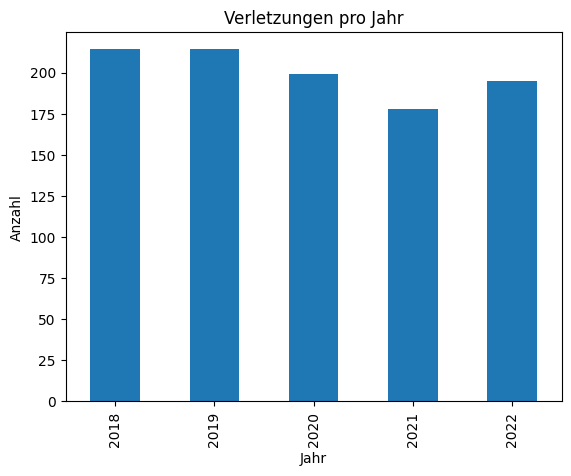

In [ ]:
df["Jahr"].value_counts().sort_index().plot(kind="bar", title="Verletzungen pro Jahr", xlabel="Jahr", ylabel="Anzahl")

👉 **Fazit:** Die Anzahl der Verletzungen verteilt sich relativ gleichmäßig über die Jahre 2018 bis 2022. Leichte Schwankungen könnten auf saisonale Einflüsse oder veränderte Erhebungsraten zurückgehen.

## 🧠 Diagnosen nach Körperregion

Welche Verletzungsarten sind typisch für bestimmte Körperregionen? Die folgende Übersicht zeigt die häufigsten Diagnosen nach Körperteil.

In [ ]:
df.groupby(["Körperregion", "Diagnose"]).size().unstack(fill_value=0)

Diagnose,Bruch,Bänderriss,Gehirnerschütterung,Luxation,Meniskusschaden,Prellung,Verstauchung,Zerrung
Körperregion,,,,,,,,
Ellenbogen,16,12,26,19,10,24,15,17
Finger,12,19,9,13,13,18,11,17
Hüfte,14,16,16,18,16,12,20,14
Knie,10,20,15,12,7,14,16,20
Kopf,11,12,16,16,18,16,16,16
Rücken,14,17,21,14,15,16,24,7
Schulter,12,23,10,16,16,17,14,21
Sprunggelenk,12,20,21,13,18,10,20,17


👉 **Fazit:** Bestimmte Diagnosen treten gehäuft bei bestimmten Körperregionen auf – z. B. Bänderrisse und Zerrungen am Knie oder Prellungen am Ellbogen. Solche Muster sind relevant für gezielte Prävention im Sport.

## 👤 Altersverteilung nach Sportart

Gibt es Unterschiede im Alter der Betroffenen je nach Sportart? Das analysiere ich im nächsten Schritt.

In [ ]:
df.groupby("Sportart")["Alter"].mean().sort_values(ascending=False)

,Alter
Sportart,
Skateboard,37.106796
Joggen,36.198198
Reiten,36.050000
Fußball,35.824176
Basketball,35.811111
Krafttraining,35.702970
Klettern,35.064220
Tanzen,34.885057
Volleyball,33.582609


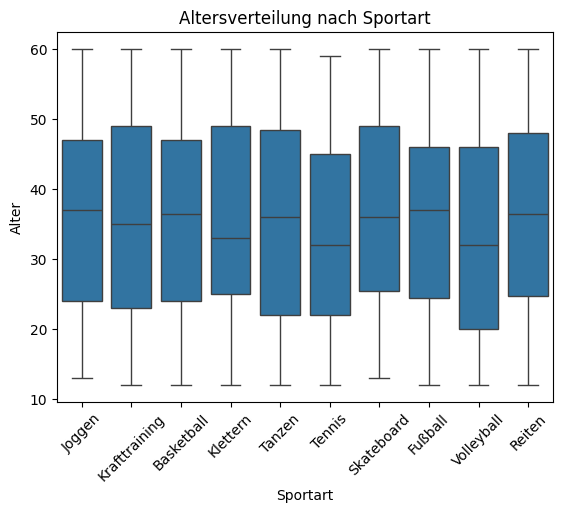

In [ ]:
import seaborn as sns
sns.boxplot(x="Sportart", y="Alter", data=df)
plt.xticks(rotation=45)
plt.title("Altersverteilung nach Sportart")
plt.show()

👉 **Fazit:** Die durchschnittlichen Verletzungsalter unterscheiden sich je nach Sportart. Beim Joggen oder Tanzen treten Verletzungen tendenziell bei älteren Personen auf, während Volleyball und Tennis eher Jüngere betrifft.

## ⚖️ Geschlechtervergleich nach Sportart

Sind bestimmte Sportarten oder Verletzungen bei einem Geschlecht häufiger vertreten? Die folgende Darstellung zeigt die Verteilung der Verletzungen nach Geschlecht innerhalb der Sportarten.

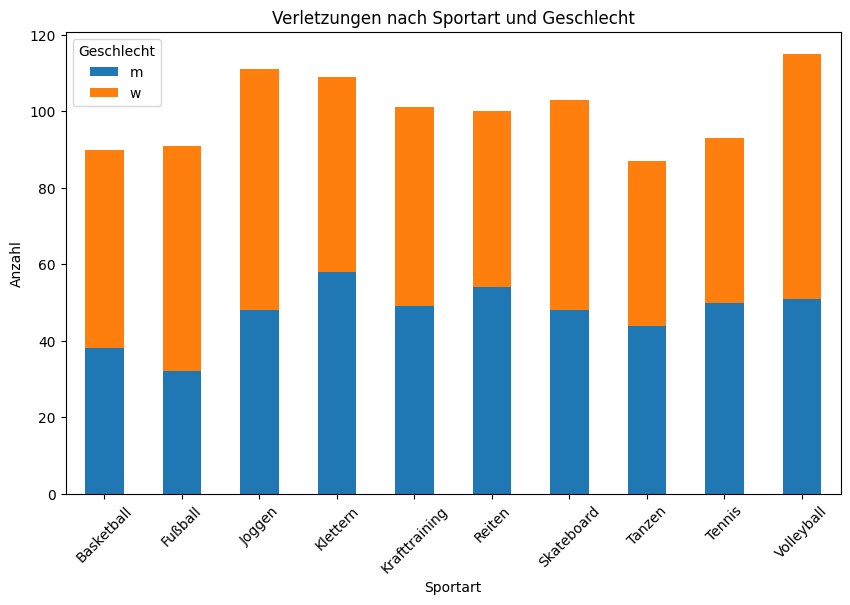

In [ ]:
df.groupby(["Sportart", "Geschlecht"]).size().unstack().plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Verletzungen nach Sportart und Geschlecht")
plt.xlabel("Sportart")
plt.ylabel("Anzahl")
plt.xticks(rotation=45)
plt.show()

👉 **Fazit:** In vielen Sportarten ist keine klare Geschlechterverteilung zu erkennen. Im Vollayball sind mehr Frauen betroffen, während z. B. im Klettern mehr Männer Verletzungen aufweisen. Insgesamt lässt sich allerdings eine Tendenz erkennen, dass Frauen häufiger von Verletzungen betroffen sind als Männer.

## 🏅 Häufigste Diagnose pro Sportart

Welche Art von Verletzung kommt in welcher Sportart am häufigsten vor? Die folgende Analyse zeigt für jede Sportart die jeweils häufigste Diagnose.

In [ ]:
df.groupby("Sportart")["Diagnose"].agg(lambda x: x.value_counts().index[0])

,Diagnose
Sportart,
Basketball,Bänderriss
Fußball,Luxation
Joggen,Zerrung
Klettern,Prellung
Krafttraining,Bänderriss
Reiten,Verstauchung
Skateboard,Gehirnerschütterung
Tanzen,Zerrung
Tennis,Gehirnerschütterung


👉 **Fazit:** Jede Sportart hat ein typisches Verletzungsprofil. So treten z. B. bei Klettern häufig Prellungen auf, während beim Basketball Bänderrisse dominieren. Diese Erkenntnisse sind nützlich für Trainingspläne und gezielte Präventionsmaßnahmen.

## 🧾 Schlussfazit

Im Rahmen dieses Projekts habe ich die häufigsten Verletzungsarten im Freizeitsport anhand eines simulierten Notaufnahme-Datensatzes mit 1.000 Fällen analysiert. Dabei wurden Verletzungen nach Sportart, Körperregion, Geschlecht, Diagnose, Alter und Jahr ausgewertet.

Die Auswertungen zeigen klare Muster:
- Sportarten wie **Volleyball, Joggen und Klettern** weisen die höchste Verletzungshäufigkeit auf.
- **Knieverletzungen** treten besonders häufig bei Tennis, Volleyball und Tanzen auf.
- Die am stärksten belasteten Körperregionen unterscheiden sich je nach Sportart; z. B. treten **Luxationen häufig beim Fußball**, **Zerrungen beim Joggen** und **Prellungen beim Klettern** auf.
- Es bestehen **altersabhängige Risikoprofile**: Bei Krafttraining und Reiten sind eher ältere Personen betroffen, während Volleyball und Tennis eher jüngere Altersgruppen betreffen.
- Der **Geschlechtervergleich** zeigt typische Verteilungen: Frauen sind z. B. im Reiten häufiger betroffen, Männer im Krafttraining oder Skateboarding.

Die Ergebnisse lassen sich für **präventive Maßnahmen im Training** nutzen und zeigen, wie datenbasierte Analysen im Bereich Sportgesundheit konkrete Handlungsempfehlungen liefern können – z. B. in Form von gezieltem Aufwärmtraining, spezifischem Techniktraining oder der Auswahl von Schutzausrüstung.

Insgesamt bietet dieses Projekt eine praxisnahe Grundlage für die Anwendung von Data Analytics im gesundheitsbezogenen Kontext.